# **Visualización para análisis exporatorio**
# AE03. Matplotlib BoxPlots

En este notebook vamos a continuar el proceso de graficar utilizando matplotlib, veremos un tipo de gráfico muy útil: cajas y bigotes (Boxplots).

Comenzamos importando las librerías que vamos a utilizar:


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para hacer las visualizaciones, utilizaremos el set de datos de las flores de Iris.

In [ ]:
#iris_path = "/content/drive/MyDrive/VGroup/Viz/Archivos/VD03.csv"
iris_path = "/content/drive/MyDrive/Gonzalo/CD-P2 ANÁLISIS EXPLORATORIO Y ESTADÍSTICA/Clase 2/VD03.csv"
iris_df = pd.read_csv(iris_path)
iris_df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
132,133,6.4,2.8,5.6,2.2,Iris-virginica
113,114,5.7,2.5,5.0,2.0,Iris-virginica
39,40,5.1,3.4,1.5,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor


## <font color='blue'>__Diagramas de Caja y Bigotes (Box Plots)__</font>

El diagrama de Caja y Bigotes es una representación univariada de los datos, utilizando múltiples componentes para poder mostrar la variabilidad y asimetría de los datos. El componente principal corresponde a la caja, compuesta por un rectángulo en el cual los limites corresponden a el primer cuartil y tercer cuartil. Adentro de dicho rectángulo se presenta una línea la cual corresponde a la mediana. El otro componente corresponde a los bigotes, los cuales se extienden hasta una distancia de $1.5 \times IQR$, donde $IQR$ corresponde al rango intercuartil y se calcula: $IQR=Q_3 - Q_1$. Finalmente, cualquier valor que supere la distancia de los bigotes, corresponden a nuestros datos atípicos (outliers), los cuales se marcan como puntos después de los bigotes.

Un "Box plot" es una forma de representar estadísticamente la *distribución* de los datos a través de cinco dimensiones principales:

- **Minimun:** Número más pequeño en el conjunto de datos.
- **First quartile:** Número medio entre el `mínimo` y la `mediana`.
- **Second quartile (Median):** Número medio del conjunto de datos (ordenado).
- **Third quartile:** Número medio entre `mediana` y `máximo`.
- **Maximum:** Número más alto en el conjunto de datos.


<center><img src="https://drive.google.com/uc?id=1xhOQdoqcI6V2vSJoxB1_tIWq9OFAkNq6" width="500">
</center>


Si nosotros quisiésemos graficar manualmente un diagrama de caja y bigote, deberíamos calcular cada elemento mencionado anteriormente para poder dibujarlo en papel y lápiz. Una de las grandes ventajas de utilizar matplotlib, es que cada uno de estos valores los calcula internamente y luego los utiliza para poder graficar cada elemento. Para esto utilizamos el método `plt.boxplot`, donde la sintaxis es la siguiente:

```python
plt.boxplot(x, *args)
```

donde `x` puede ser un arreglo unidimensional, o $n$-dimensional (donde se generarán $n$ cajas).

Un ejemplo de esto utilizando el set de datos de Iris, obtendremos el Box plot de la variable `SepalLengthCm`:


{'whiskers': [<matplotlib.lines.Line2D at 0x7ba886d72b60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ba886d730a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ba886ce3ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ba886d73820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ba886d71030>],
 'means': []}

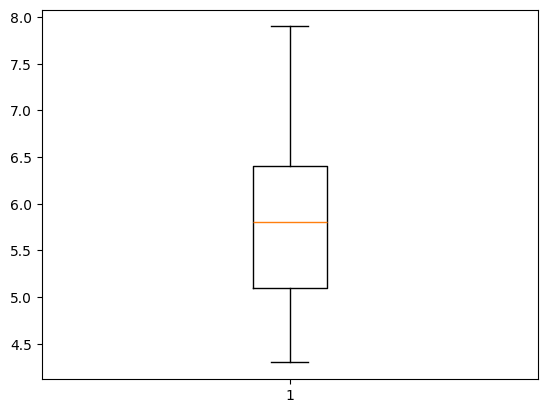

In [ ]:
plt.boxplot(iris_df['SepalLengthCm'])

A primera vista podemos ver que la mayoría de los elementos están presentes. Un punto importante a notar sobre como grafica `matplotlib` se puede ver en la respuesta a la ejecución del código sin utilizar en la última línea el método `plt.show()`. En este caso, el método de `boxplot` nos retorna un diccionario con todos los objetos artistas para cada elemento pintado (esto es útil si quisiésemos modificar específicamente un artista en específico).

Otro punto importante es la asimetría presente en los bigotes presentes en el ejemplo anterior. Por defecto `matplotlib` al calcular el rango intecuartil revisa los valores máximos y mínimos presentes en los datos a graficar. Si $(Q_3 + 1.5 IQR) > max(X)$ o $(Q_1 - 1.5 IQR) < min(X)$, lo que realizará matplotlib es cortar los bigotes en los valores máximos y mínimos.


Viendo los argumentos de boxplot, una de las primeras modificaciones es que podemos agregar la visualización de la media, para esto utilizamos el parámetro `showmeans`, el cual por defecto viene con valor `False`. En este caso, cambiando dicho valor a `True` mostrara la media como un punto dentro de la caja.

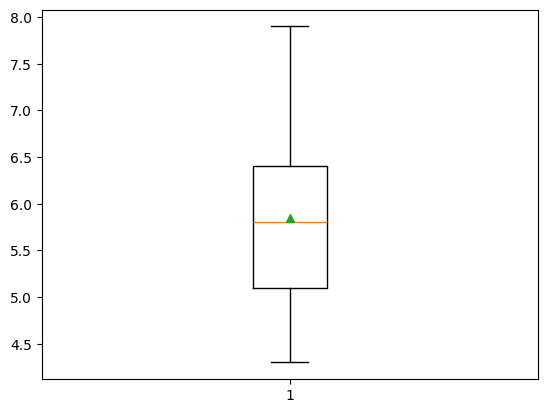

In [ ]:
plt.boxplot(iris_df['SepalLengthCm'], showmeans=True)
plt.show()

Para mantener consistencia con el uso de líneas dentro de nuestro boxplot, podemos utilizar el parámetro `meanline` para especificar el tipo de marcador de línea a utilizar.

A modo de ejemplo, la línea de la media se mostrará en color verde:


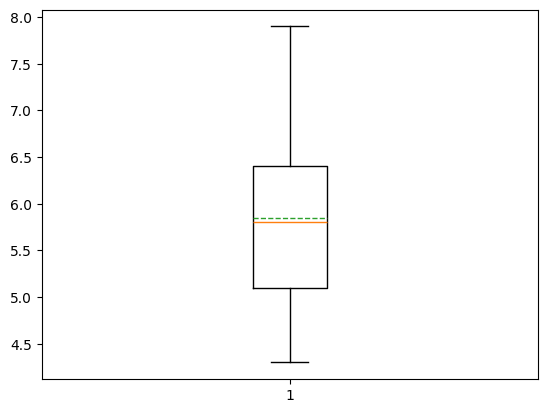

In [ ]:
plt.boxplot(iris_df['SepalLengthCm'],showmeans=True, meanline='-')
plt.show()

## <font color='purple'>**EXPERIMENTO**</font><br>

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

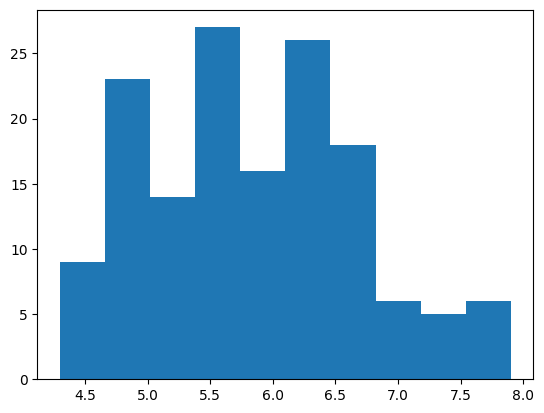

In [ ]:
plt.hist(iris_df['SepalLengthCm'])

El boxplot tiene más sentido en este caso cuando se quiere ver las medias, medianas y otros estadísticos importantes, como los cuartiles (Q1, Q3) y los outliers, por varias razones:

**Resumen de la distribución:** El boxplot ofrece un resumen visual claro de la distribución de los datos, destacando la mediana, los cuartiles y los valores atípicos. Esto permite ver de manera directa la forma de la distribución y la variabilidad sin necesidad de contar con un número grande de barras, como en un histograma.

**Resalta la mediana y la media:** En el boxplot, la mediana (línea dentro de la caja) es fácil de identificar, y si añades la media, también puedes compararlas directamente. En un histograma, la media y la mediana no están tan claramente marcadas, y podrías tener que calcular estos valores y ubicarlos manualmente en el gráfico.

**Menos influencia de los valores extremos:** Los boxplots son menos sensibles a los outliers en comparación con los histogramas. En un histograma, los valores extremos pueden distorsionar la distribución de las barras, mientras que en un boxplot, los valores atípicos se muestran claramente como puntos fuera de los "bigotes", lo que facilita su análisis.

**No depende de los intervalos:** En un histograma, los resultados pueden depender de cómo se definan los bins o intervalos. Diferentes elecciones de bins pueden dar lugar a interpretaciones diferentes, mientras que en un boxplot los datos se dividen de manera más consistente según los cuartiles, lo que es más intuitivo cuando quieres ver la tendencia central y la dispersión.

**En resumen, un boxplot es más eficiente cuando te interesa entender la distribución en términos de media, mediana, cuartiles y valores atípicos de manera concisa.**

<font color='purple'>**FIN EXPERIMENTO**</font><br>

Utilizando como ejemplo un arreglo bidimensional, graficaremos cada caja y bigote por separado para cada variable.

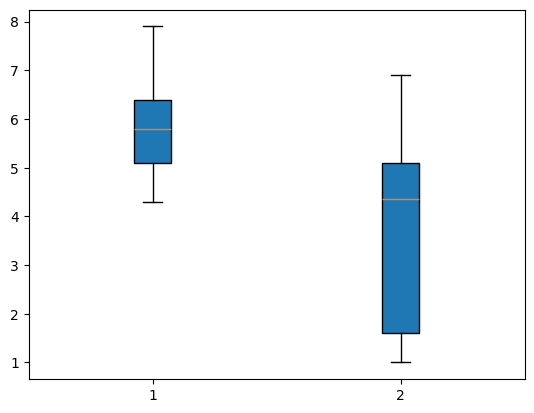

In [ ]:
columns_to_plot = [iris_df['SepalLengthCm'],iris_df['PetalLengthCm']]
plt.boxplot(columns_to_plot, patch_artist=True)

plt.show()

**¿Que pasaría si graficáramos utilizando dos sentencias de boxplot como se muestran a continuación?:**

```python
plt.boxplot(iris_df['SepalLengthCm'])
plt.boxplot(iris_df['PetalLengthCm'])
```


## <font color='purple'>**EXPERIMENTO**</font><br>

{'whiskers': [<matplotlib.lines.Line2D at 0x7ba8842ff880>,
 'caps': [<matplotlib.lines.Line2D at 0x7ba8842fccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ba8842fe0e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ba8842fe440>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ba8842ffd90>],
 'means': []}

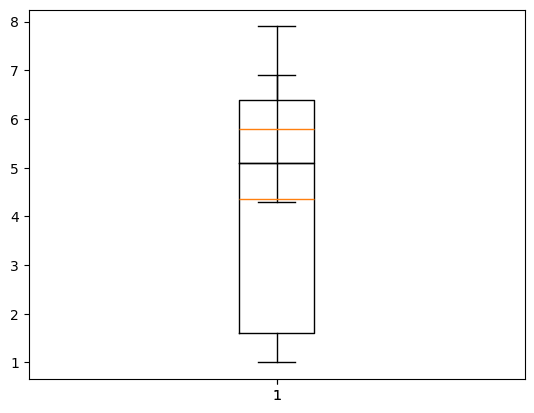

In [ ]:
plt.boxplot(iris_df['SepalLengthCm'])
plt.boxplot(iris_df['PetalLengthCm'])

El gráfico resultante tendrá los dos boxplots superpuestos, lo que puede generar un par de inconvenientes dependiendo de lo se quiera visualizar

**Superposición de los boxplots:** Los dos boxplots se graficarán en el mismo lugar, lo que hace que no se distinga claramente entre las distribuciones de SepalLengthCm y PetalLengthCm. Ambos boxplots estarán representados con la misma escala, lo que puede dificultar la comparación visual, ya que los rangos de los valores de las dos columnas podrían ser diferentes (por ejemplo, el largo de los sépalos y los pétalos suelen tener rangos distintos).

**Confusión en la interpretación:** Al no diferenciar los dos boxplots de manera clara, podría ser confuso identificar cuál corresponde a cuál. Aunque algunos detalles, como los valores atípicos, las medianas y los cuartiles, podrían estar visibles, se pierde claridad en cuanto a qué se refiere cada uno de ellos.

**Para solucionarlo podemos hacer lo siguiente:**

{'whiskers': [<matplotlib.lines.Line2D at 0x7ba884100cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ba884101210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ba884100a30>,
 'medians': [<matplotlib.lines.Line2D at 0x7ba884101750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ba8841019f0>,
 'means': []}

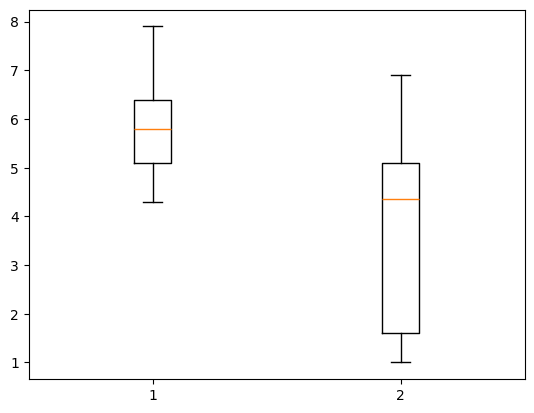

In [ ]:
plt.boxplot([iris_df['SepalLengthCm'], iris_df['PetalLengthCm']], positions=[1, 2])

<font color='purple'>**FIN EXPERIMENTO**</font><br>